In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Twitter_volume_AMZN.csv', index_col=['timestamp'], parse_dates=['timestamp'])
df.head()

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


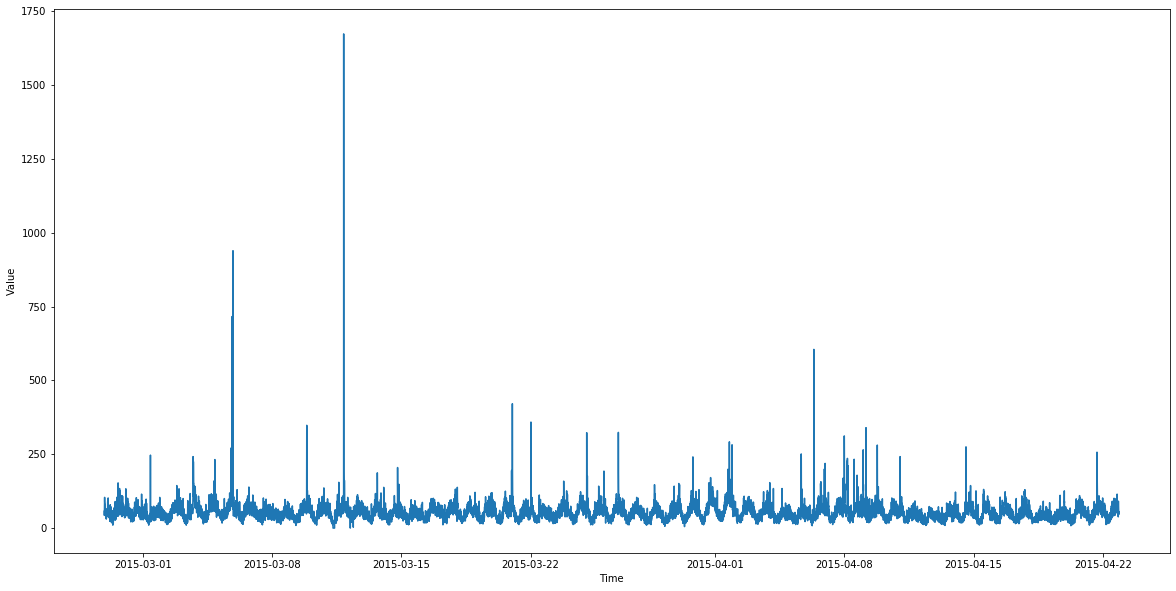

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(df)
plt.show()

The figure above shows that this data is very periodic, and also there are some data in the dataset are significantly anomaly, so I choose this data to implement my anomaly dectection models. 

The figure below plot the data in 9 days, as it shows, there are some low twitter value after midnight and in the morning, and have some high twitter value during afternoon, which is make sense that peple usuly use twitter after their work in the afternoon.

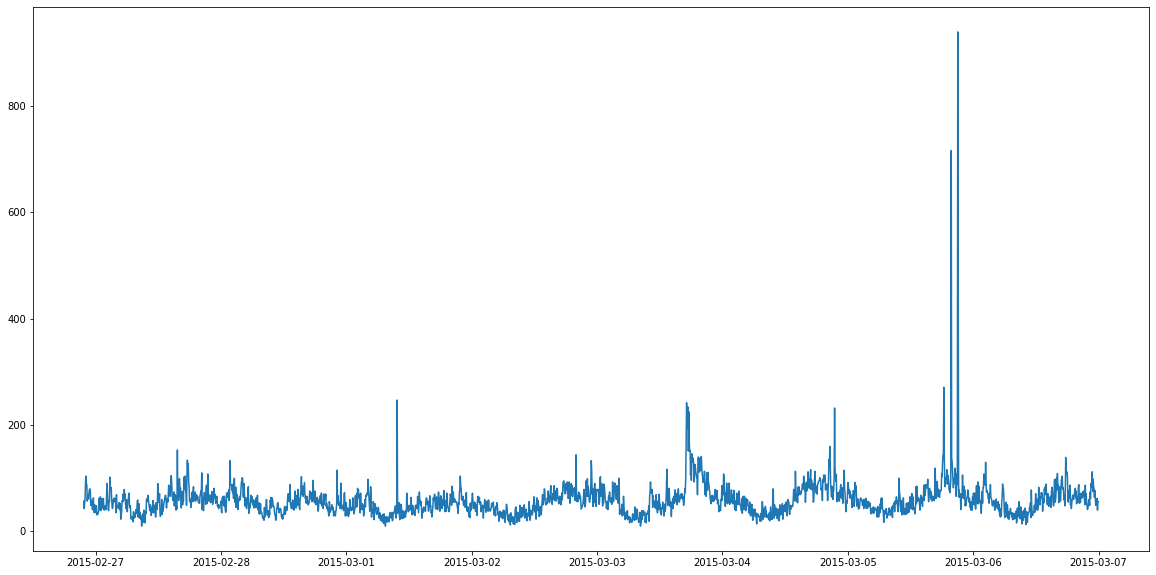

In [3]:
df_single_month = df.loc[df.index < "2015-03-07"]
plt.figure(figsize=(20,10))
plt.plot(df_single_month)
plt.show()

I then trained the data with Isolation Forest model, Local Outlier Factor model, and One Class SVM model. 

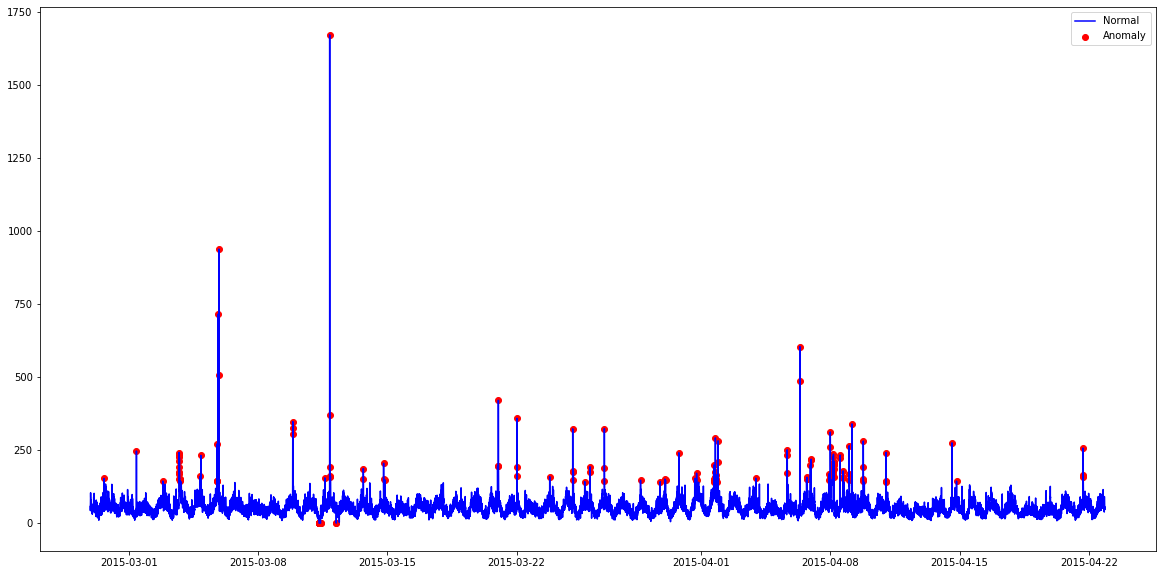

In [4]:
from sklearn.ensemble import IsolationForest

IF_model = IsolationForest(contamination=0.01, behaviour='new', random_state=1)
IF_model.fit(df)

df['anomaly'] = IF_model.predict(df)

fig, ax = plt.subplots(figsize=(20,10))

anomalies = df.loc[df['anomaly'] == -1, ['value']]

ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anomalies.index, anomalies['value'], color='red', label='Anomaly')

plt.legend()
plt.show()

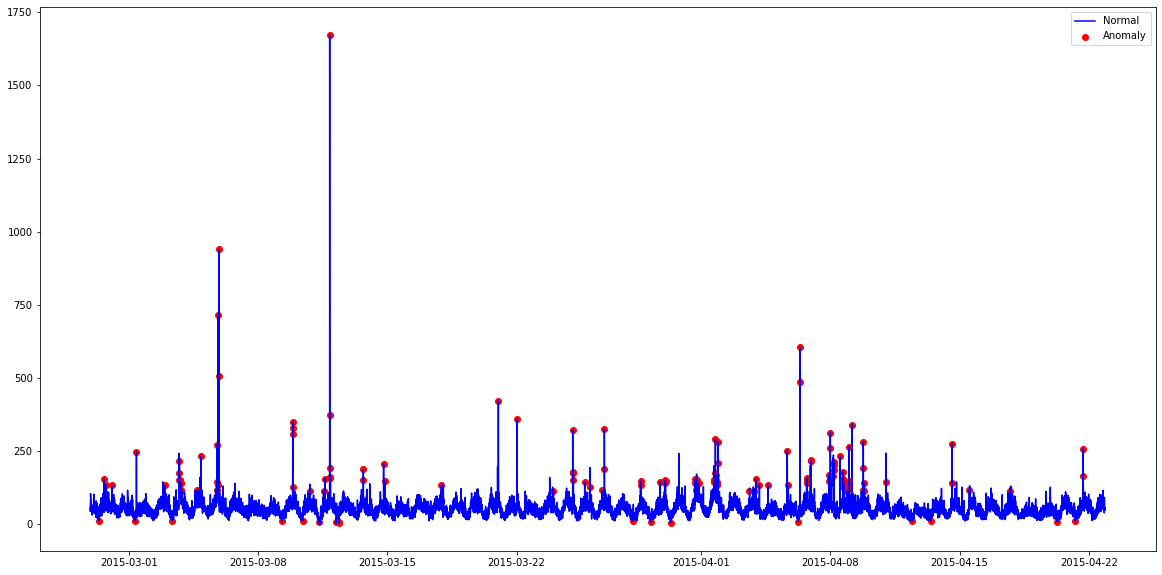

In [5]:
from sklearn.neighbors import LocalOutlierFactor

LOF_model = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
#LOF_model.fit(df)

df['anomaly2'] = LOF_model.fit_predict(df)

fig, ax = plt.subplots(figsize=(20,10))

anomalies2 = df.loc[df['anomaly2'] == -1, ['value']]

ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anomalies2.index, anomalies2['value'], color='red', label='Anomaly')

plt.legend()
plt.show()

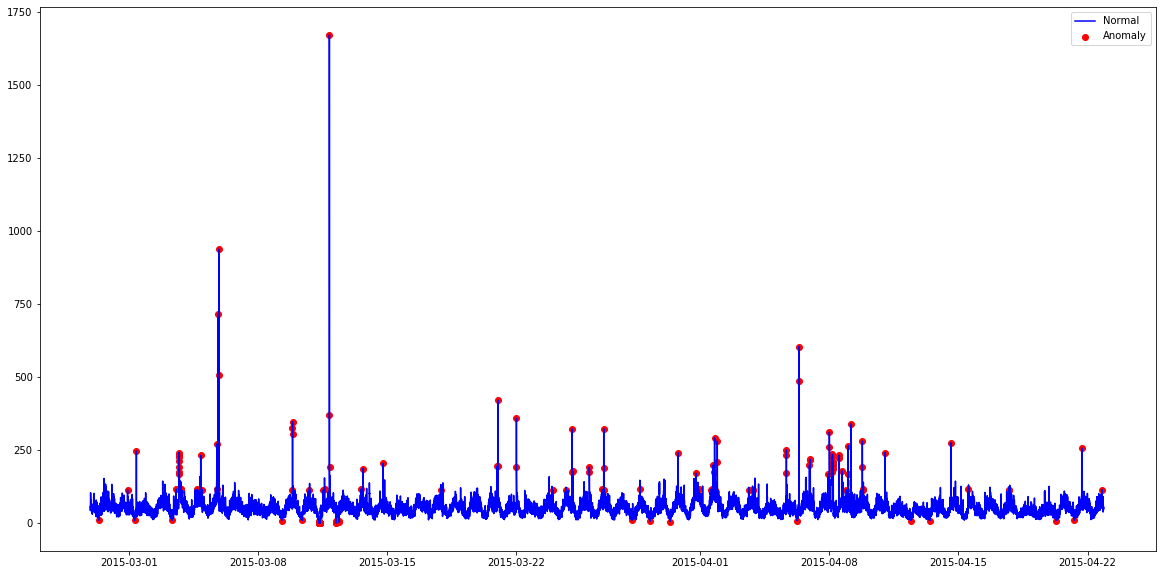

In [6]:
from sklearn import svm

OCSVM_model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.0001)
OCSVM_model.fit(df)

df['anomaly3'] = OCSVM_model.predict(df)

fig, ax = plt.subplots(figsize=(20,10))

anomalies3 = df.loc[df['anomaly3'] == -1, ['value']]

ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anomalies3.index, anomalies3['value'], color='red', label='Anomaly')

plt.legend()
plt.show()

As conclusion, all three of the models are able to detect the anomalies. As performance, it seems like Isolation Forest has lower performance than the other two, and the other two model has about the same performance. But the perfomance can also be changed by modify the parameters of each model. 